###  print out structures

In [1]:
import random
import numpy as np
import pprint

from mycrograd_debug.engine_debug import Value
from mycrograd_debug.nn_debug import Neuron, Layer, MLP
from mycrograd_debug.drawviz_debug import draw_dot, draw_nn
from mycrograd_debug.util_debug import (
    debugPrint,
    print_my_params,
    print_all_values,
    backupParameters,
    restoreParameters,
)


np.random.seed(1337)
random.seed(1337)
pp = pprint.PrettyPrinter(indent=4)

#### Multi Layer Perceptron 1-2-1

In [2]:
# initialize a model
nin = 1  # number of inputs
nout = 1  # number of outputs
Value.value_counter = 0

model = MLP(
    nin, [2, nout], lastReLU=True, weightsinit=2, debug_bw=True
)  # 1-layer neural network
print("parameters")
# pp.pprint(model.parameters())
print_my_params(model)

originalParams=backupParameters(model)
# pp.pprint(originalParams)

restoreParameters(model, originalParams)

Module nn MLP: structure [1, 2, 1]
parameters
 name lay neu ty   data   grad
 v001  L1  N1 w1   0.50   0.00
 v002  L1  N1  b   0.00   0.00
 v003  L1  N2 w1   0.50   0.00
 v004  L1  N2  b   0.00   0.00
 v005  L2  N1 w1   0.60   0.00
 v006  L2  N1 w2   1.20   0.00
 v007  L2  N1  b   0.00   0.00


inputs
[   Value(name=v008,layernumber=,neuronnumber=,weightnumber=,type=i,data=7, grad=0),
    Value(name=v009,layernumber=,neuronnumber=,weightnumber=,type=i,data=8, grad=0)]
backward add v017            0.00 ->   1.00  v018            0.00 ->   1.00
backward mul v006 L2 N1 w2   0.00 ->   3.50  v015            0.00 ->   1.20
backward add v004 L1 N2  b   0.00 ->   1.20  v013            0.00 ->   1.20
backward mul v003 L1 N2 w1   0.00 ->   8.40  v008        i   0.00 ->   0.60
backward add v007 L2 N1  b   0.00 ->   1.00  v016            0.00 ->   1.00
backward mul v005 L2 N1 w1   0.00 ->   3.50  v012            0.00 ->   0.60
backward add v002 L1 N1  b   0.00 ->   0.60  v010            0.00 ->   0.60
backward mul v001 L1 N1 w1   0.00 ->   4.20  v008        i   0.60 ->   0.90
number of Value objects created =  19


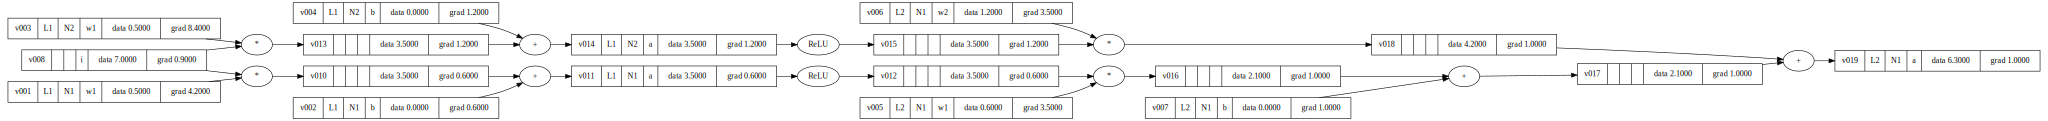

In [3]:
xinumbers = list(range(7, 7 + nin + 1))
xinput = [Value(x, type="i") for x in xinumbers]
print("inputs")
pp.pprint(xinput)

activation = model(xinput)
activation.backward()

print("number of Value objects created = ", Value.value_counter)

draw_dot(activation, debug_print_01=False)

In [4]:
# Test Parameter backup and restore
print("original params")
print_my_params(model)
for p in model.parameters():
    p.data += -0.1 * p.grad
print("updated params")
print_my_params(model)
restoreParameters(model, originalParams)
print("restored params")
print_my_params(model)

original params
 name lay neu ty   data   grad
 v001  L1  N1 w1   0.50   4.20
 v002  L1  N1  b   0.00   0.60
 v003  L1  N2 w1   0.50   8.40
 v004  L1  N2  b   0.00   1.20
 v005  L2  N1 w1   0.60   3.50
 v006  L2  N1 w2   1.20   3.50
 v007  L2  N1  b   0.00   1.00
updated params
 name lay neu ty   data   grad
 v001  L1  N1 w1   0.08   4.20
 v002  L1  N1  b  -0.06   0.60
 v003  L1  N2 w1  -0.34   8.40
 v004  L1  N2  b  -0.12   1.20
 v005  L2  N1 w1   0.25   3.50
 v006  L2  N1 w2   0.85   3.50
 v007  L2  N1  b  -0.10   1.00
restored params
 name lay neu ty   data   grad
 v001  L1  N1 w1   0.50   4.20
 v002  L1  N1  b   0.00   0.60
 v003  L1  N2 w1   0.50   8.40
 v004  L1  N2  b   0.00   1.20
 v005  L2  N1 w1   0.60   3.50
 v006  L2  N1 w2   1.20   3.50
 v007  L2  N1  b   0.00   1.00


#### Multi Layer Perceptron 1-2-2

Module nn MLP: structure [1, 2, 2]
parameters
 name lay neu ty   data   grad
 v001  L1  N1 w1   0.30   0.00
 v002  L1  N1  b   0.00   0.00
 v003  L1  N2 w1   0.50   0.00
 v004  L1  N2  b   0.00   0.00
 v005  L2  N1 w1   0.50   0.00
 v006  L2  N1 w2   1.00   0.00
 v007  L2  N1  b   0.00   0.00
 v008  L2  N2 w1   0.60   0.00
 v009  L2  N2 w2   1.20   0.00
 v010  L2  N2  b   0.00   0.00
inputs  [Value(name=v011,layernumber=,neuronnumber=,weightnumber=,type=i,data=1, grad=0)]
model(xinput)
[   Value(name=v019,layernumber=L2,neuronnumber=N1,weightnumber=,type=a,data=0.65, grad=0),
    Value(name=v023,layernumber=L2,neuronnumber=N2,weightnumber=,type=a,data=0.7800000000000001, grad=0)]
backward add v035 L2 N2  a   0.00 ->   1.00  v031 L2 N1  a   0.00 ->   1.00
backward add v033            0.00 ->   1.00  v034            0.00 ->   1.00
backward add v010 L2 N2  b   0.00 ->   1.00  v032            0.00 ->   1.00
backward mul v008 L2 N2 w1   0.00 ->   0.30  v025 L1 N1  a   0.00 ->   0.60
backwar

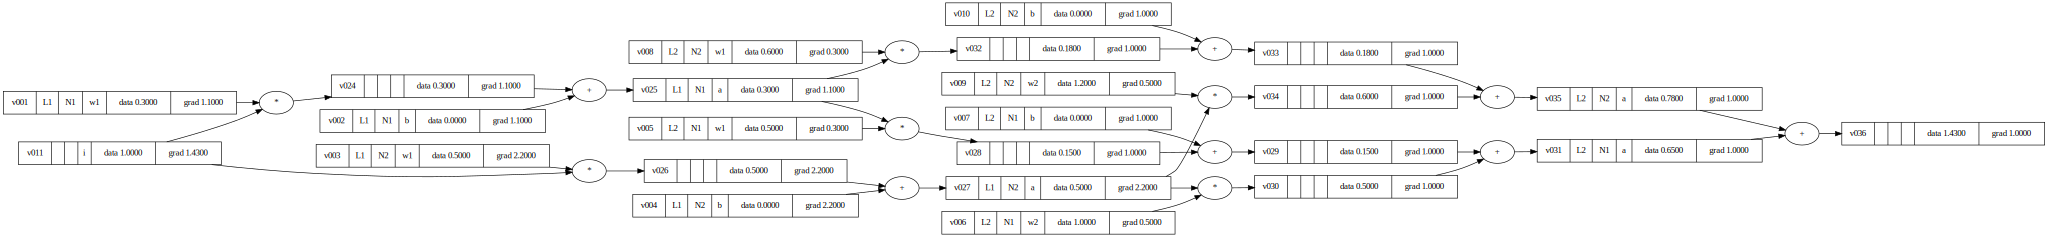

In [5]:
# initialize a model
nin = 1  # number of inputs
nout = 2  # number of outputs
Value.value_counter = 0

model = MLP(
    nin, [2, nout], lastReLU=False, weightsinit=2, debug_bw=True
)  # 1-layer neural network
print("parameters")
# pp.pprint(model.parameters())
print_my_params(model)

xinumbers = list(range(1, nin + 1))
xinput = [Value(x, type="i") for x in xinumbers]
print("inputs ", xinput)

print("model(xinput)")
pp.pprint(model(xinput))

activation = []
activation = model(xinput)

loss = activation[1] + activation[0]
loss.backward()

print("number of Value objects created = ", Value.value_counter)

draw_dot(loss, debug_print_01=False)

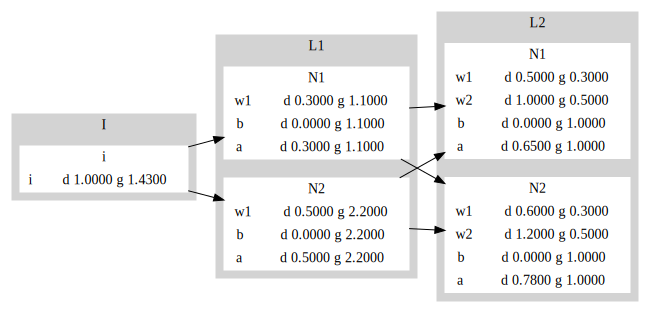

In [6]:
draw_nn(xinput, model)

#### Multi Layer Perceptron 3-4-4-1

In [7]:
# loss function single MLP
def loss_single(target, output):
    # total_loss = (output - target)*(output - target)
    total_loss = output + target
    total_loss.type = "l"
    return total_loss

Module nn MLP: structure [3, 4, 4, 1]
parameters
 name lay neu ty   data   grad
 v001  L1  N1 w1   0.20   0.00
 v002  L1  N1 w2   0.40   0.00
 v003  L1  N1 w3   0.60   0.00
 v004  L1  N1  b   0.00   0.00
 v005  L1  N2 w1   0.30   0.00
 v006  L1  N2 w2   0.60   0.00
 v007  L1  N2 w3   0.90   0.00
 v008  L1  N2  b   0.00   0.00
 v009  L1  N3 w1   0.40   0.00
 v010  L1  N3 w2   0.80   0.00
 v011  L1  N3 w3   1.20   0.00
 v012  L1  N3  b   0.00   0.00
 v013  L1  N4 w1   0.60   0.00
 v014  L1  N4 w2   1.20   0.00
 v015  L1  N4 w3   1.80   0.00
 v016  L1  N4  b   0.00   0.00
 v017  L2  N1 w1   0.30   0.00
 v018  L2  N1 w2   0.60   0.00
 v019  L2  N1 w3   0.90   0.00
 v020  L2  N1 w4   1.20   0.00
 v021  L2  N1  b   0.00   0.00
 v022  L2  N2 w1   0.30   0.00
 v023  L2  N2 w2   0.60   0.00
 v024  L2  N2 w3   0.90   0.00
 v025  L2  N2 w4   1.20   0.00
 v026  L2  N2  b   0.00   0.00
 v027  L2  N3 w1   0.40   0.00
 v028  L2  N3 w2   0.80   0.00
 v029  L2  N3 w3   1.20   0.00
 v030  L2  N3 w4   1.

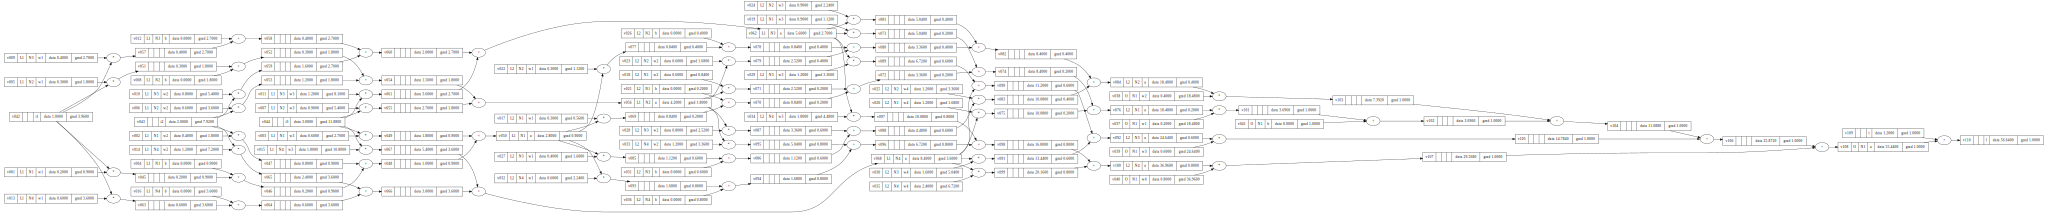

In [8]:
# initialize a model
nin = 3  # number of inputs
nout = 1  # number of outputs
Value.value_counter = 0

model = MLP(
    nin, [4, 4, nout], lastReLU=False, weightsinit=2, debug_bw=True
)  # neural network
print("parameters")
# pp.pprint(model.parameters())
print_my_params(model)

xinumbers = list(range(1, nin + 1))
xinput = [Value(x, type="i%s" % index) for index, x in enumerate(xinumbers, start=1)]
print("inputs")
pp.pprint(xinput)

activation = model(xinput)

# ys = [[1.0]]
xtarget = Value(1.2, type="t")  # desired targets

loss = loss_single(activation, xtarget)
loss.backward()
print("loss= ", loss)
print("number of Value objects created = ", Value.value_counter)

draw_dot(loss, debug_print_01=False)

#### 4 times Multi Layer Perceptron 3-4-4-1

In [9]:
# loss function multiple MLP's
def loss_mult(targets, outputs):
    total_loss = sum((yout - ygt) ** 2 for ygt, yout in zip(outputs, targets))
    return total_loss

Module nn MLP: structure [3, 4, 4, 1]
parameters
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
inputs
[   [   Value(name=v042,layernumber=,neuronnumber=,weightnumber=,type=i,data=1, grad=0),
        Value(name=v043,layernumber=,neuronnumber=,weightnumber=,type=i,data=2, grad=0),
        Value(name=v044,layernumber=,neuronnumber=,weightnumber=,type=i,data=3, grad=0),
        Value(name=v045,layernumber=,neuronnumber=,weightnumber=,type=i,data=4, grad=0)],
    [   Value(name=v046,layernumber=,neuronnumber=,weightnumber=,type=i,data=5, grad=0),
        Value(name=v047,layernumber=,neuronnumber=,weightnumber=,type=i,data=6, grad=0),
        Value(name=v048,layernumber=,neuronnumber=,weightnumber=,type=i,data=7, grad=0),
        Value(name=v049,layernumber=,neuronnumber=,weightnumber=,type=i,data=8, grad=0)],
    [   Value(name=v050,layernumber=,neuronnumber=,weightnumber=,type=i,data=9, grad=0),
        Value(name=v051,layernumber=,neuronnumber=,weightnumber=,type=i,data=10, grad=0),
     

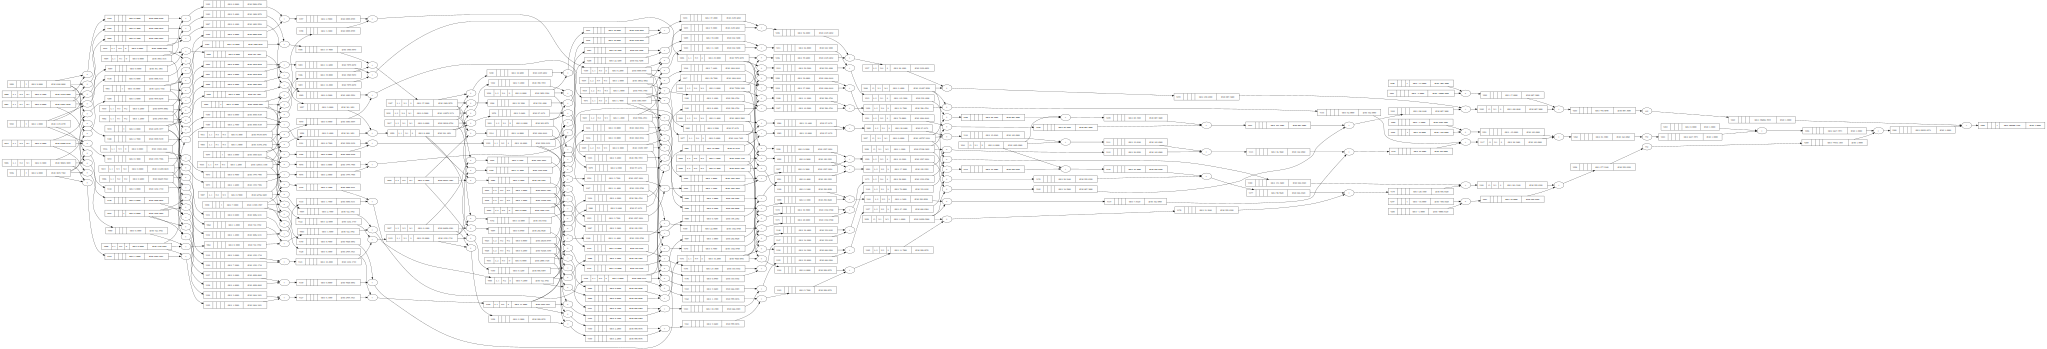

In [10]:
# initialize a model
nin = 3  # number of inputs
nout = 1  # number of outputs

Value.value_counter = 0

model = MLP(nin, [4, 4, nout], lastReLU=False, weightsinit=2, debug_bw=True)  # 2-layer neural network
print("parameters")
# pp.pprint(model.parameters())
# print_my_params(model)

xinumbers1 = np.array(list(range(1, nin * 4 + 1)))
xinumbers = xinumbers1.reshape(nin, 4)
print(xinumbers)

xinput = [[Value(3) for x in range(4)] for y in range(3)]

for i in range(len(xinumbers)):
    for j in range(len(xinumbers[i])):
        xinput[i][j].type = "i"
        xinput[i][j].data = xinumbers[i][j]

# print("input 0 ", xinput[0])
print("inputs")
pp.pprint(xinput)

activation = [model(x) for x in xinput]

ys = [15.0, -16.0, -17.0, 18.0]  # desired targets
xtarget = [Value(x, type="t") for x in ys]
print("xtarget")
pp.pprint(xtarget)

loss = loss_mult(activation, xtarget)
loss.type="l"

print("loss= ", loss)
print("number of Value objects created = ", Value.value_counter)
loss.backward()

draw_dot(loss)